Installing and importing the library

In [1]:
import sys
!{sys.executable} -m pip install ../. --quiet --user #installation of library in local enviorment
from pyRN import pyRN

Initialization of a example network

In [2]:
file="../networks/rn_test.txt"
RN = pyRN.setFromText(file)
# RN=pyRN.setRandomgeneratedWithInflow()

Calculation of the Close Reactive Structrue and retriving the organizations, this is necessary for the subsequent calculation of the simple random walk. 

In [3]:
# Calculation of the generators
RN.setGenerators()
# Calculation of the Closed Reactive Strucutre
RN.setSynStr()

# Printing all organizations
list(map(RN.printSp,RN.SynStrOrgListBtArray))

level:  1 from  6 , node:  1  from  2
level:  1 from  6 , node:  2  from  2
level:  2 from  6 , node:  1  from  2
level:  2 from  6 , node:  2  from  2
level:  3 from  6 , node:  1  from  1
level:  4 from  6 , node:  1  from  1
level:  6 from  6 , node:  1  from  1
Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Species:  {s4, s5, s6, s7, s8,}
Species:  {s4, s6, s8,}
Species:  {s1, s10, s11, s2, s3, s4, s5, s6, s7, s8, s9,}
Species:  {s7, s9,}


[None, None, None, None, None]

Testing directly below function, this function is use later for calculating the Hasse diagram and also used in the simple random walk.

In [4]:
for i in range(len(RN.SynStrOrgListBtArray)):
    print("Organization")
    RN.printSp(RN.SynStrOrgListBtArray[i])
    print("Organizations Directly Below")
    list(map(RN.printSp,RN.getDirectlyBelowBtList(RN.SynStrOrgListBtArray[i], RN.SynStrOrgListBtArray)))

Organization
Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Organizations Directly Below
Species:  {s4, s5, s6, s7, s8,}
Species:  {s7, s9,}
Organization
Species:  {s4, s5, s6, s7, s8,}
Organizations Directly Below
Species:  {s4, s6, s8,}
Organization
Species:  {s4, s6, s8,}
Organizations Directly Below
Organization
Species:  {s1, s10, s11, s2, s3, s4, s5, s6, s7, s8, s9,}
Organizations Directly Below
Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Organization
Species:  {s7, s9,}
Organizations Directly Below


Testing the Hasse Diagram Function, this generates a networkx object that can be used whit any collection of sets, if they are in a bitarray format. Here we use it to display the organization Hasse diagram.

In [5]:
import networkx as nx
from pyvis.network import Network
from bitarray import bitarray as bt

net=RN.getHasseNxFromBtList(RN.SynStrOrgListBtArray,setlabel="L")
net = nx.relabel_nodes(net, lambda x: str(RN.getIndArrayFromBt(bt(x))))
nt = Network('500px', '500px',directed=False,notebook=True)
nt.toggle_physics(False)
nt.from_nx(net)
nt.show("test.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Testing the Genetator perturbation, aso used in the simple random walk

In [6]:
v=RN.GInBListBt[1].copy()
v.setall(0)
print("init v:",v)
for i in range(20):

    print("rand v:",RN.getGPert(v))

init v: bitarray('000000')
rand v: bitarray('110100')
rand v: bitarray('010001')
rand v: bitarray('001100')
rand v: bitarray('011100')
rand v: bitarray('010000')
rand v: bitarray('101001')
rand v: bitarray('101001')
rand v: bitarray('101001')
rand v: bitarray('000101')
rand v: bitarray('110100')
rand v: bitarray('000101')
rand v: bitarray('101000')
rand v: bitarray('101100')
rand v: bitarray('001101')
rand v: bitarray('101010')
rand v: bitarray('011100')
rand v: bitarray('110000')
rand v: bitarray('010010')
rand v: bitarray('100101')
rand v: bitarray('000110')


Testing the Simple Random Walk, the function recives as argument the w keys of the dictionary of repetitions of the random walk, l the number of steps of the random walk, d is the delta value of active species increases with each pertubationin the random walk steps. nmin the minimal number of active species for the perturbation, and fname the name of the json file where the random walk is saved. 

In [7]:
RN.setRwSimple(w=range(2),l=10,d=1,nmin=3,fname="simple_rand_walk.json")
RN.setMakRw(w=range(2),l=10,cutoff=.1,n=500,trys=10,sim_save=True,fname="mak_rand_walk.json")

walk: 1, step: 1
walk: 1, step: 2
walk: 1, step: 3
walk: 1, step: 4
walk: 1, step: 5
walk: 1, step: 6
walk: 1, step: 7
walk: 1, step: 8
walk: 1, step: 9
walk: 1, step: 10
walk: 2, step: 1
walk: 2, step: 2
walk: 2, step: 3
walk: 2, step: 4
walk: 2, step: 5
walk: 2, step: 6
walk: 2, step: 7
walk: 2, step: 8
walk: 2, step: 9
walk: 2, step: 10


In [8]:
print(RN.RwDict['simple'][1])

{'p':         0     1     2     3     4     5     6     7     8     9
s1   True  True  True  True  True  True  True  True  True  True
s10  True  True  True  True  True  True  True  True  True  True
s11  True  True  True  True  True  True  True  True  True  True
s2   True  True  True  True  True  True  True  True  True  True
s3   True  True  True  True  True  True  True  True  True  True
s4   True  True  True  True  True  True  True  True  True  True
s5   True  True  True  True  True  True  True  True  True  True
s6   True  True  True  True  True  True  True  True  True  True
s7   True  True  True  True  True  True  True  True  True  True
s8   True  True  True  True  True  True  True  True  True  True
s9   True  True  True  True  True  True  True  True  True  True, 'c':         0     1     2     3     4     5     6     7     8     9
s1   True  True  True  True  True  True  True  True  True  True
s10  True  True  True  True  True  True  True  True  True  True
s11  True  True  True  True 

In [9]:
print(RN.RwDict['mak'][0])

{'s':        0         1         2         3         4         5         6  \
s1   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.587213   
s10  0.0  0.859067  0.000000  0.000000  0.912641  0.640721  0.000000   
s11  0.0  1.197698  1.375544  1.129244  0.596667  1.067572  1.585374   
s2   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.224258   
s3   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.301902   
s4   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s5   0.0  0.000000  0.000000  1.889408  1.601268  0.000000  0.000000   
s6   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s7   0.0  0.000000  0.000000  0.000000  0.000000  0.654227  0.000000   
s8   0.0  0.000000  1.653152  0.000000  0.000000  0.000000  0.000000   
s9   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            7         8         9  
s1   0.000000  0.000000  0.514272  
s10  0.000000  0.000000  0.000000  
s11  1.558690  1.8916

Now we will see a series of plot functions associated to the random walk. The following correspond the active species in each step. These function can be run after the latter funtion has been run. It recive as input an matplotlib.pyplot.subplot `axes` object, the index of the random walk to be plot (`walk_index`) and the type of abstraction (`'c'` for convergent and `'p'` for perturbed state), and a title string.

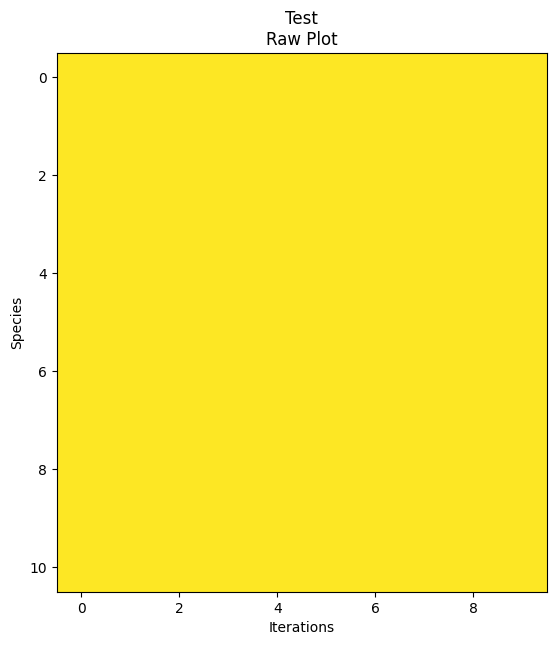

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotRawRw(axes, walk_type='simple',walk_index=1, abstraction_type='c', title="Test")
plt.show()

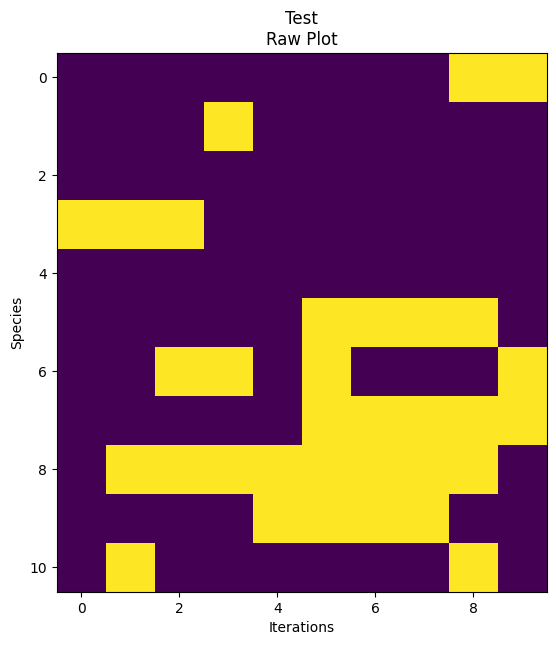

In [11]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotRawRw(axes, walk_type='mak',walk_index=1, abstraction_type='a', title="Test")
plt.show()

The folowing correspond to the evolutionary change of random walk, recives the same arguments as the latter, but whit added plot options (`show_indices, index_spacing` and `legend`) 

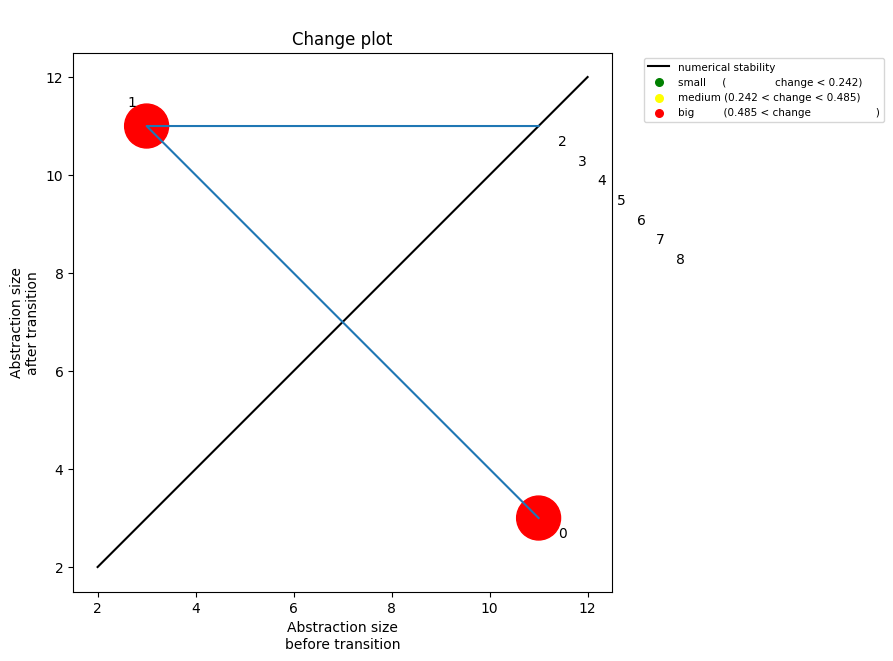

In [12]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotChangeRw(axes, walk_type='simple',walk_index=0, abstraction_type='c', 
                   title='', show_indices=True, index_spacing=1, legend=True)
plt.show()

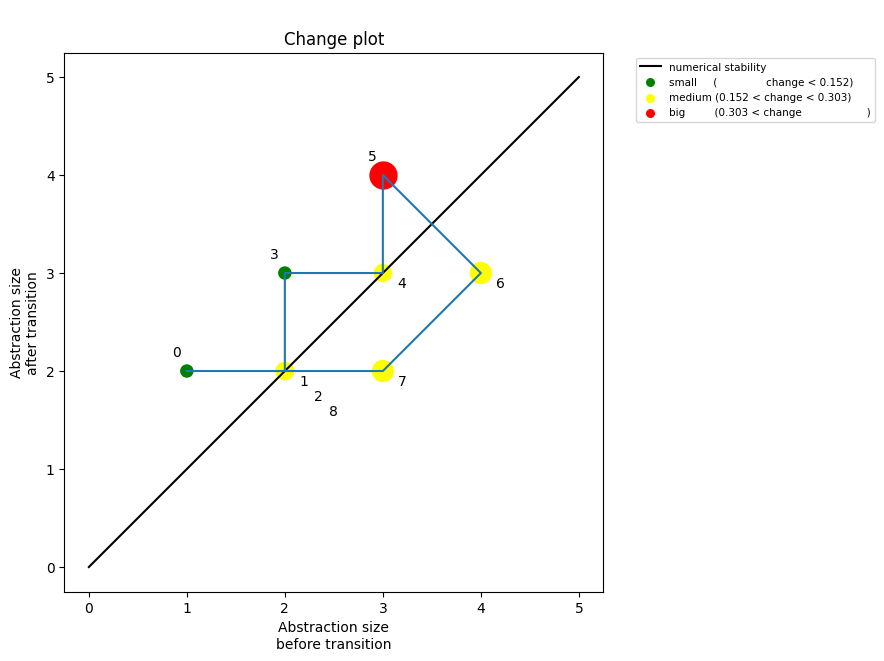

In [13]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotChangeRw(axes, walk_type='mak',walk_index=0, abstraction_type='a', 
                   title='', show_indices=True, index_spacing=1, legend=True)
plt.show()

Two plot for for the evolutionary trajectories are plotted. The first of these considers the possibility of plotting all repetitions of the random walks of the network. The second can plot the perturbations and their convergent states for a particular walk. The fist one recive similar arguments as the latter function, but here the variable `walk_indexes` correspond to a list of keys of the walks to plot, is this variable is `None` then the function will plot all of the walks. The `loga` change the scale to logaritmic.  

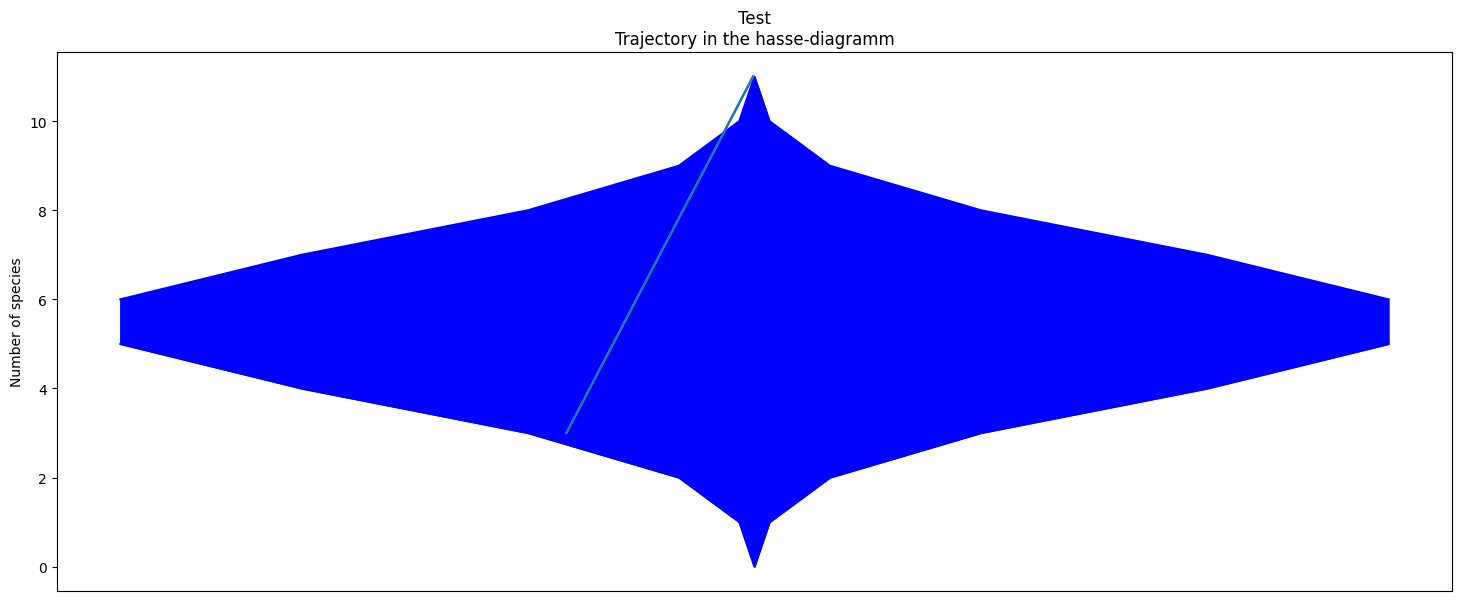

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseRw(axes, walk_type='simple', walk_indexes=None, abstraction_type='c', title='Test', loga=False)
 
plt.show()

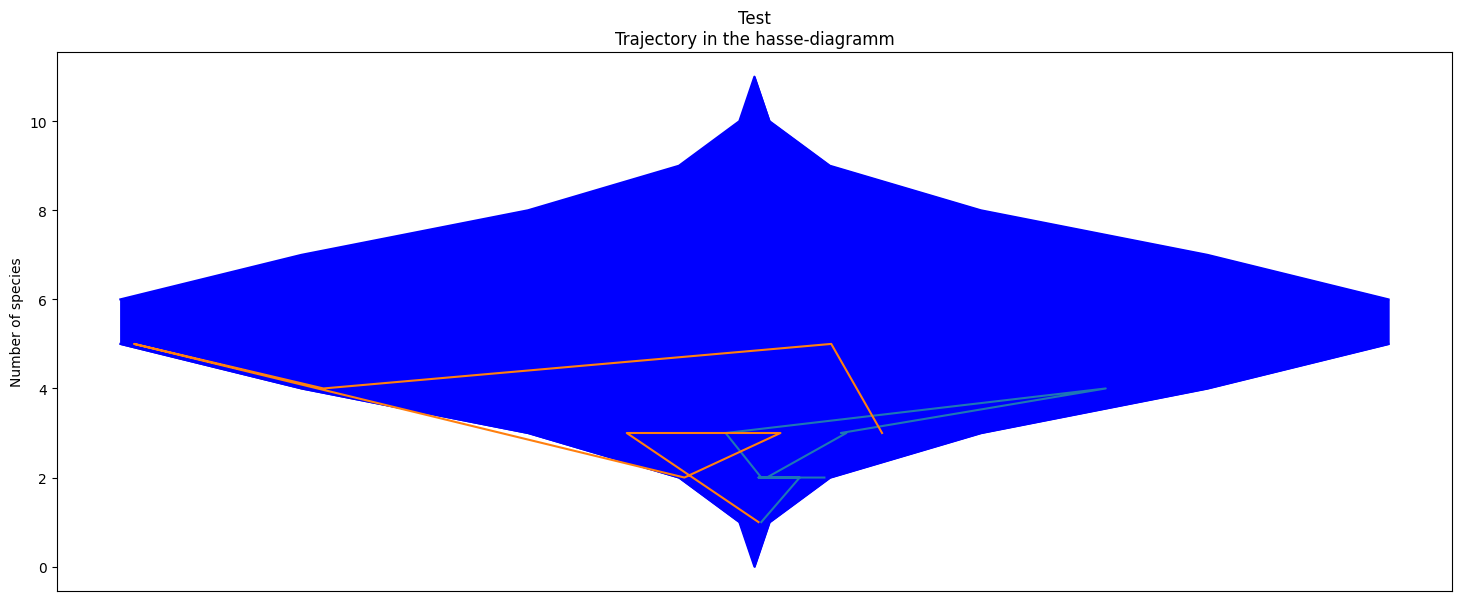

In [15]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseRw(axes, walk_type='mak', walk_indexes=None, abstraction_type='a', title='Test', loga=False)
 
plt.show()

As describe before, this function describe a specific random walk considering the convergent and perturbed steps. Here again the `walk_index` variable correspond to the key of the random walk to be ploted.

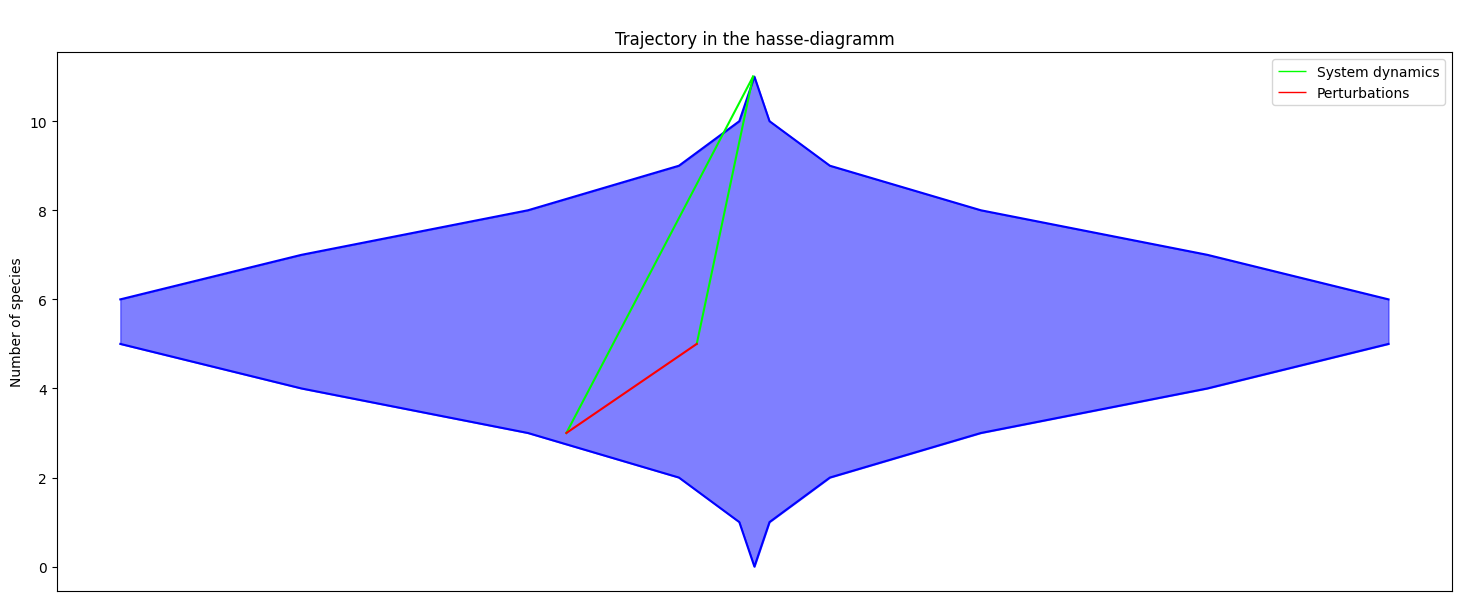

In [16]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseConvergenceAndPerturbationRw(axes,walk_type='simple', walk_index=0,  
                                              convergent_abstraction_type='c',
                                              title='', loga=False)
plt.show()

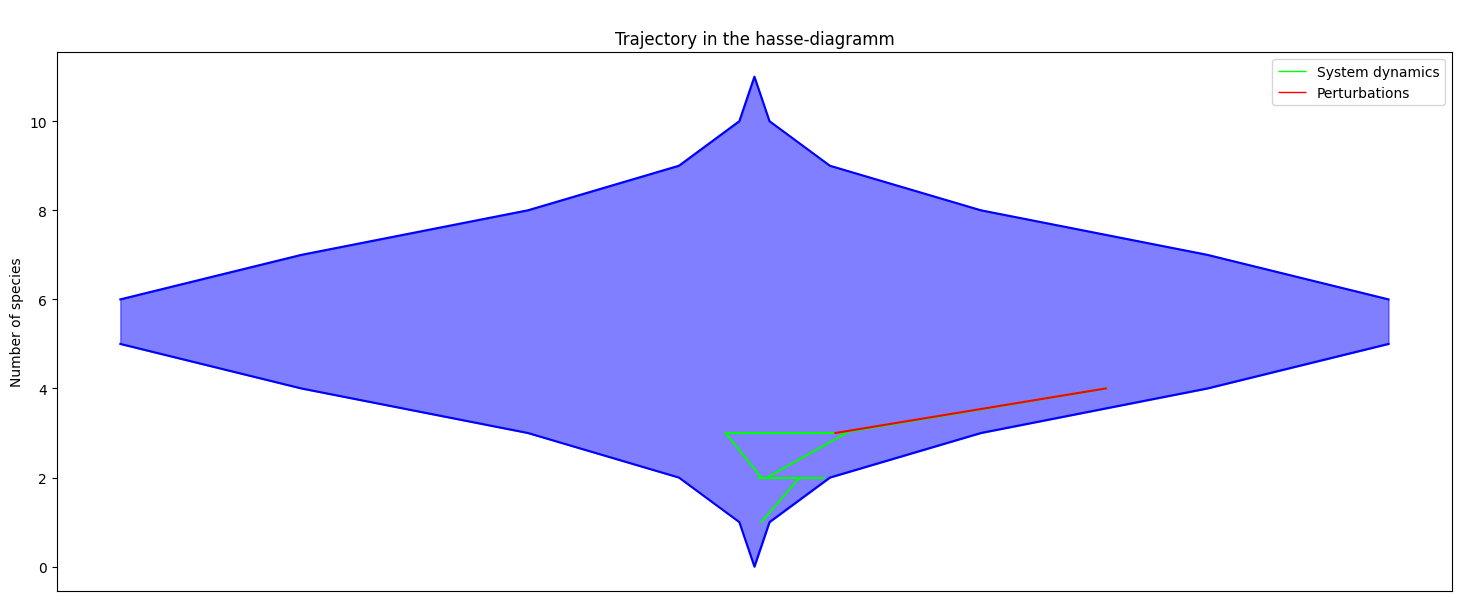

In [17]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseConvergenceAndPerturbationRw(axes,walk_type='mak', walk_index=0,  
                                              convergent_abstraction_type='a',
                                              title='', loga=False)
plt.show()

In [18]:
simple_abst_df,simple_trans_df= RN.getAbstrationTransitionDf(walk_type='simple',walk_indexes=None,
                                                             abstraction_type='c',complexity_type='cc')

In [19]:
simple_abst_df

,abstraction,initial_distribution,n_species,complexity,reachability,maintainability,strict_maintainability
0,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]",0.0,3,1.0,3,0.055556,0.000000
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,11,6.0,0,0.944444,0.941176


In [20]:
simple_trans_df

,a2,a1,a_1,a_2,counts,probability,change_local,change_global,change_complexity
0,1,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]",1,0.058824,0.727273,0.727273,5.0
1,0,1,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1,1.000000,0.727273,0.727273,-5.0
2,1,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",16,0.941176,0.000000,0.000000,0.0


In [21]:
mak_abst_df, mak_trans_df= RN.getAbstrationTransitionDf(walk_type='mak',walk_indexes=None,
                                                        abstraction_type='a',complexity_type='ca')

In [22]:
mak_abst_df

,abstraction,initial_distribution,n_species,complexity,reachability,maintainability,strict_maintainability
0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.5,1,0.500000,0,0.000000e+00,0.0
1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0.5,1,0.142857,0,0.000000e+00,0.0
2,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]",0.0,2,0.892857,2,0.000000e+00,0.0
3,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,2,1.000000,1,0.000000e+00,0.0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",0.0,2,1.726190,3,0.000000e+00,0.0
5,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]",0.0,2,1.476190,2,0.000000e+00,0.0
6,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,2,0.642857,4,0.000000e+00,0.0
7,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]",0.0,2,1.250000,4,0.000000e+00,0.0
8,"[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]",0.0,3,1.750000,3,0.000000e+00,0.0
9,"[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]",0.0,3,1.642857,2,0.000000e+00,0.0


In [23]:
mak_trans_df

,a2,a1,a_1,a_2,counts,probability,change_local,change_global,change_complexity
0,0,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",1,1.0,0.500000,0.090909,-0.500000
1,3,5,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]",1,1.0,0.666667,0.181818,-0.476190
2,5,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]",1,1.0,0.666667,0.181818,0.583333
3,2,12,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]",1,1.0,0.333333,0.090909,-0.500000
4,12,8,"[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]",1,1.0,0.500000,0.181818,-0.357143
5,8,15,"[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]",1,1.0,0.833333,0.454545,0.821429
6,15,14,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]",1,1.0,0.600000,0.272727,-0.690476
7,14,7,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]",1,1.0,0.750000,0.272727,0.369048
8,7,6,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",1,1.0,0.666667,0.181818,0.607143
9,1,13,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]",1,1.0,0.666667,0.181818,-1.642857


The following function plots all the Markovian probabilities of a simple random walk. The input parameters correspond to: 

- `axes` : Matplotlib subplot object.
- `walk_indexes`: `Keys` of `SimpleRWDict` Dictonary considered, if `walk_indexes=None`, it use all the dictionary keys
- `abstraction_type`: corrspond to the type of abstraction to be considered, if its `'all'` used both perturbation and convegence states        
- `save`, (boolean), if `True`: Stores the dataframes in the same directory as the input file
- `file_path`(string), path were dataframes are to be stored


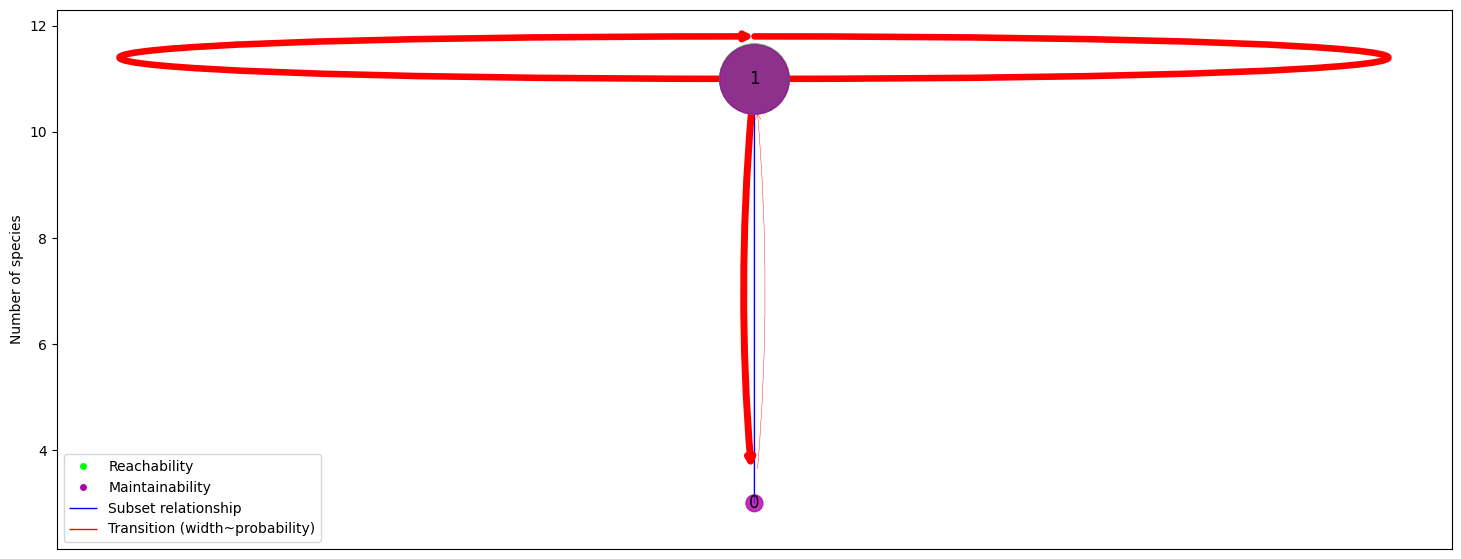

In [24]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotMarkovRw(axes,walk_type='simple', walk_indexes=None, abstraction_type='c',complexity_type='cc')
plt.show()

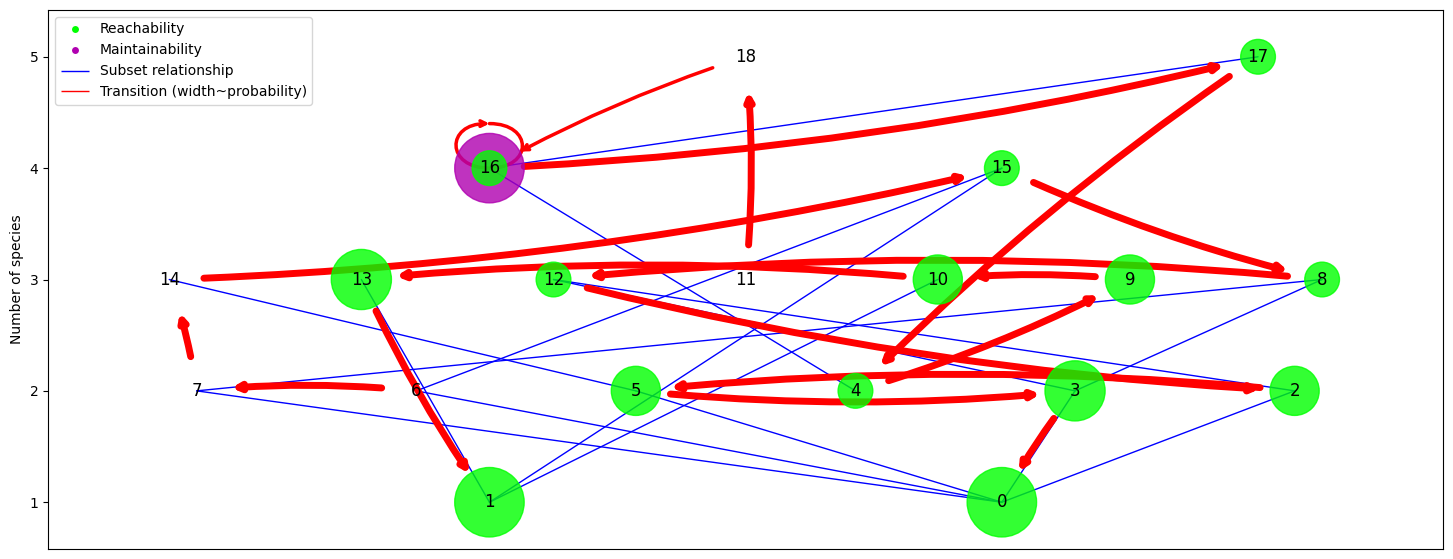

In [25]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotMarkovRw(axes,walk_type='mak', walk_indexes=None, abstraction_type='a',complexity_type='ca')
plt.show()

We can also plot the histogram of abstractions of simple random walks.

Parameters:

- `axes` : Matplotlib subplot object.
- `walk_indexes` : Kyes of SimpleRWDict Dictonary considered, if `walk_indexes=None`, it use all the dictionary keys. Variable optional, The default is `None`.
- `abstraction_type` : `string`, optional. Corrspond to the type of abstraction to be considered, if its `'all'` used both perturbation and convegence states. The default is `'c'`.

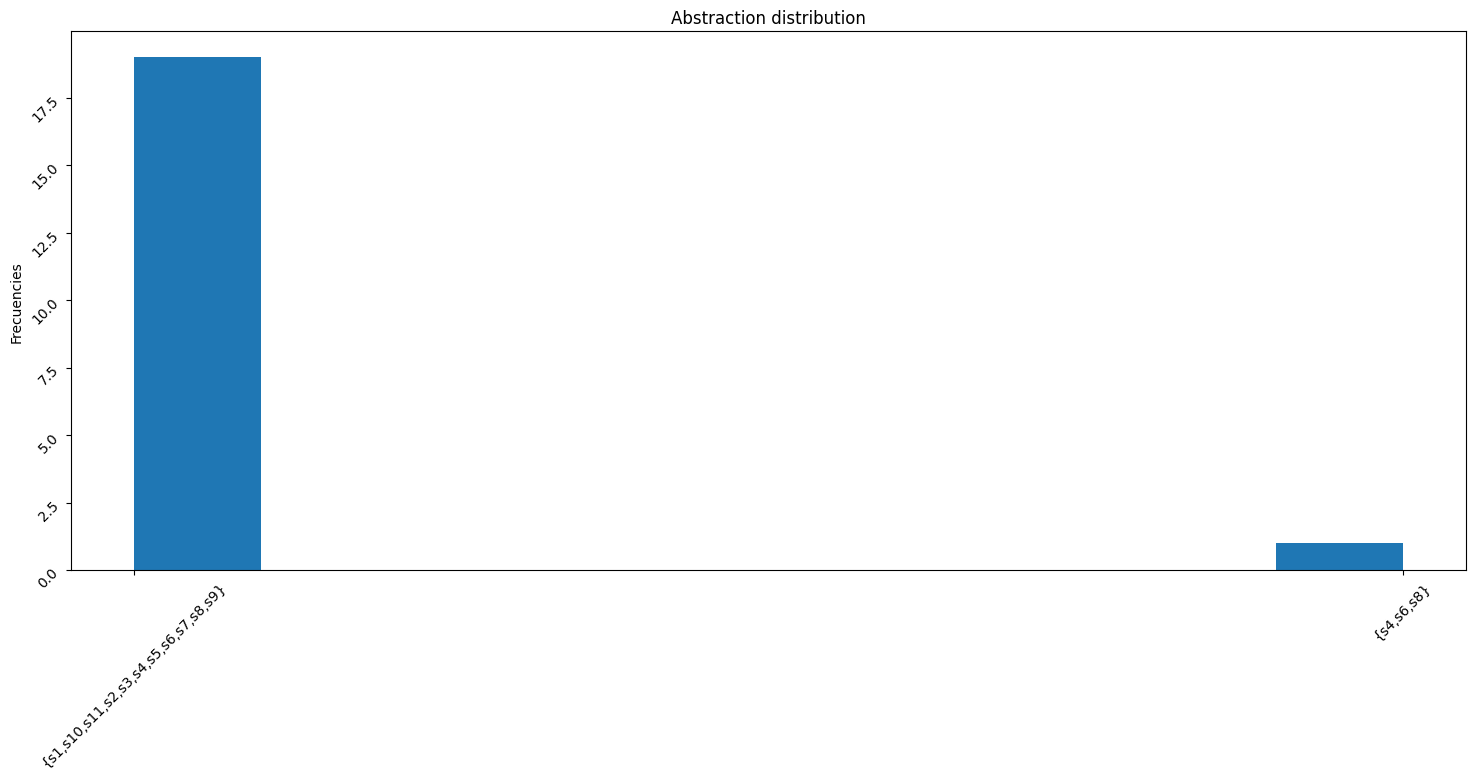

In [26]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHistAbstRw(axes, walk_type='simple', walk_indexes=None, abstraction_type='c')
plt.show()

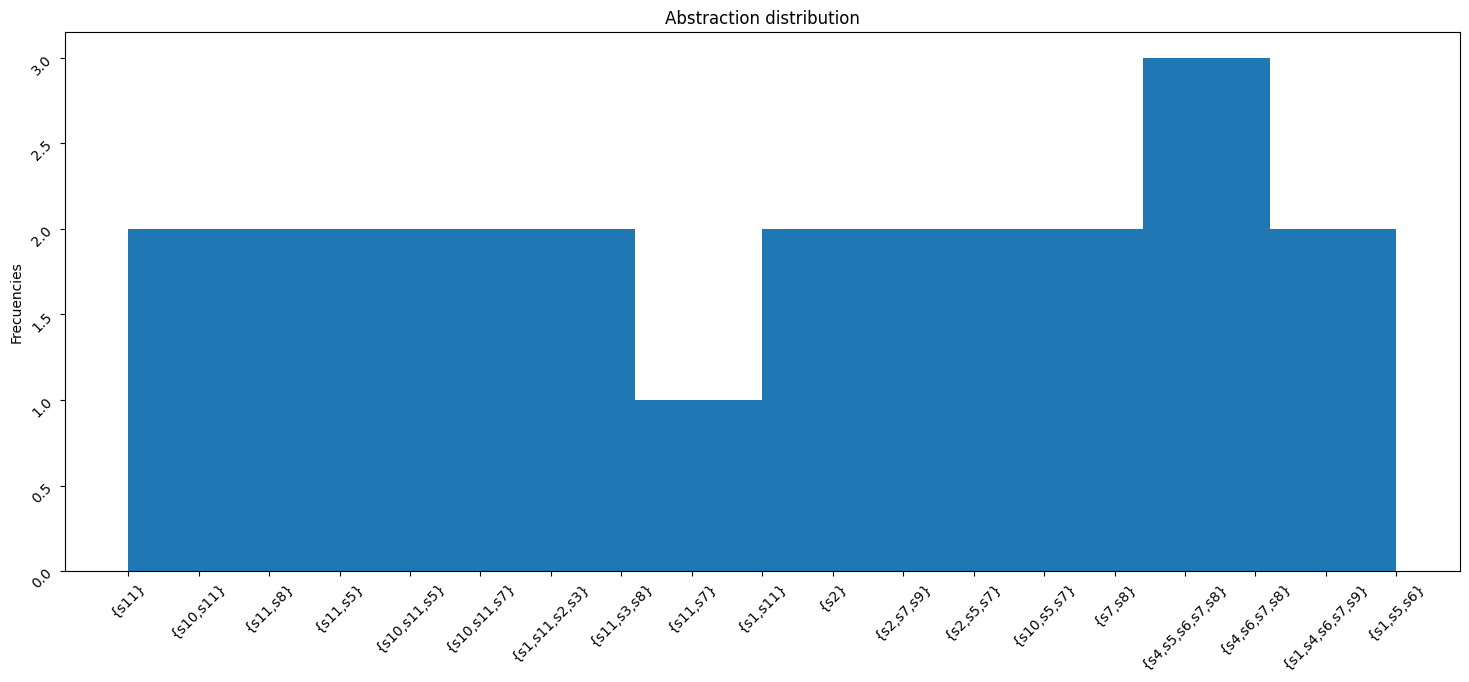

In [27]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHistAbstRw(axes, walk_type='mak', walk_indexes=None, abstraction_type='a')
plt.show()

Like the `RN.plotChangeSimpleRw` function, the evolution of the simple random walk can be plotted, in terms of its contraction and growth, but in this case, considering its complexity. This function receives input:
- `axes` : Matplotlib subplot object.
- `walk_indexes`: `Keys` of `SimpleRWDict` Dictonary considered, if `walk_indexes=None`, it use all the dictionary keys
- `abstraction_type`: corrspond to the type of abstraction to be considered, if its `'all'` used both perturbation and convegence states 

optional:             
- `save` (boolean), if True: Stores the dataframes in the same directory as the input file
- `file_path` (string),  path were dataframes are to be stored
- `show_indices` (boolean), chooses if indices of transitions will be displayed
- `index_spacing` (float), modifies spacing between indices


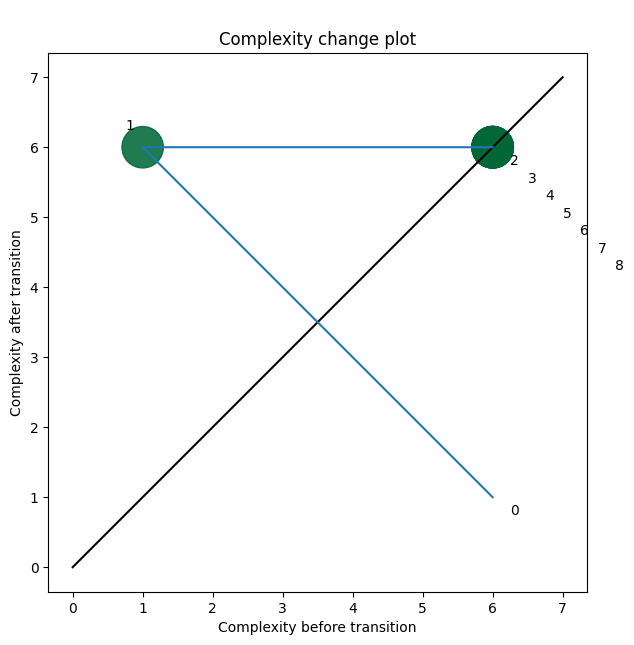

In [28]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotComplexityChangeRw(axes, walk_type='simple', walk_index=0, 
                               abstraction_type='c', complexity_type='cc', 
                               title='', show_indices=True, index_spacing=1, legend=True)
plt.show()

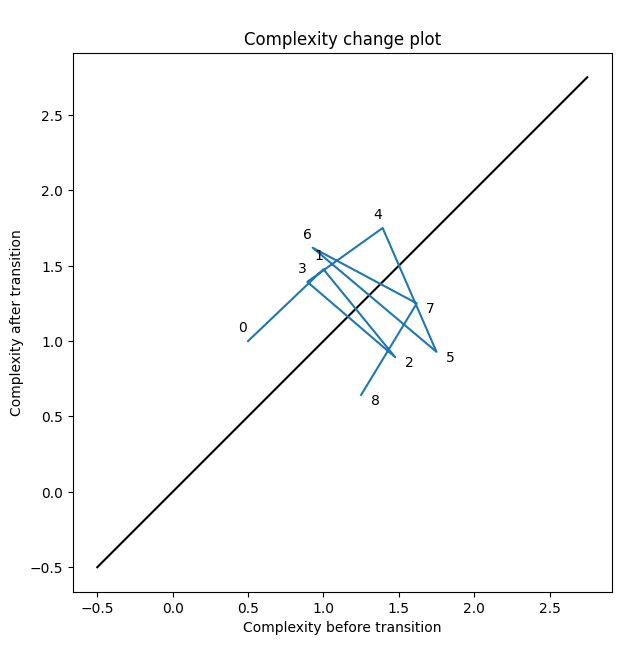

In [29]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotComplexityChangeRw(axes, walk_type='mak', walk_index=0, 
                               abstraction_type='a', complexity_type='ca', 
                               title='', show_indices=True, index_spacing=1, legend=True)
plt.show()